# Importing Libraries

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.stats.proportion import proportions_ztest, proportion_confint

pd.set_option('display.max_columns', 50)
pd.set_option('display.max_rows', 200)
sns.set_style('whitegrid')
%matplotlib inline

# Loading the Data

In [4]:
df = pd.read_csv(r"D:\ibrahim\data analyst\portfolio_projects\ab testing python project\marketing_AB.csv")
df.head()

,Unnamed: 0,user id,test group,converted,total ads,most ads day,most ads hour
0,0,1069124,ad,False,130,Monday,20
1,1,1119715,ad,False,93,Tuesday,22
2,2,1144181,ad,False,21,Tuesday,18
3,3,1435133,ad,False,355,Tuesday,10
4,4,1015700,ad,False,276,Friday,14


In [5]:
df.shape

(588101, 7)

# Preprocessing

In [7]:
#to check if the user id column has any duplicates
df.duplicated(subset="user id").sum()

0

In [8]:
#drop the col Unnamed: 0
df.drop('Unnamed: 0',axis=1,inplace=True)

In [9]:
df.head()

,user id,test group,converted,total ads,most ads day,most ads hour
0,1069124,ad,False,130,Monday,20
1,1119715,ad,False,93,Tuesday,22
2,1144181,ad,False,21,Tuesday,18
3,1435133,ad,False,355,Tuesday,10
4,1015700,ad,False,276,Friday,14


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 588101 entries, 0 to 588100
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   user id        588101 non-null  int64 
 1   test group     588101 non-null  object
 2   converted      588101 non-null  bool  
 3   total ads      588101 non-null  int64 
 4   most ads day   588101 non-null  object
 5   most ads hour  588101 non-null  int64 
dtypes: bool(1), int64(3), object(2)
memory usage: 23.0+ MB


In [11]:
x = df.isnull().sum()
print(f'Total missing values: \n{x}')

Total missing values: 
user id          0
test group       0
converted        0
total ads        0
most ads day     0
most ads hour    0
dtype: int64


In [12]:
duplicate = df.duplicated().sum()
print(f"Total duplicated values: {duplicate}")

Total duplicated values: 0


# EDA

In [14]:
#distribution of test groups
df['test group'].value_counts()

test group
ad     564577
psa     23524
Name: count, dtype: int64

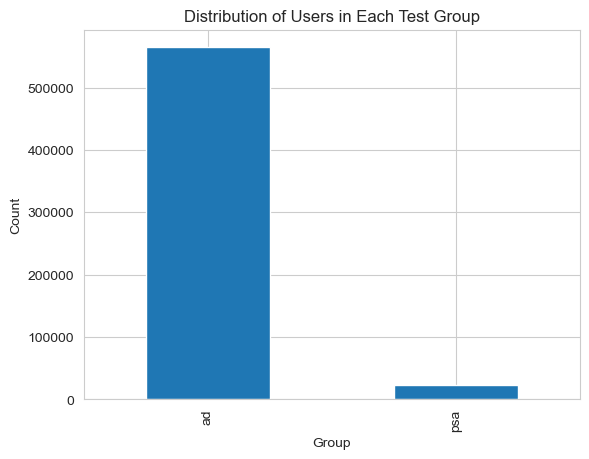

In [15]:
#visualize group sizes
df['test group'].value_counts().plot(kind='bar')
plt.title('Distribution of Users in Each Test Group')
plt.xlabel('Group')
plt.ylabel('Count')
plt.show()

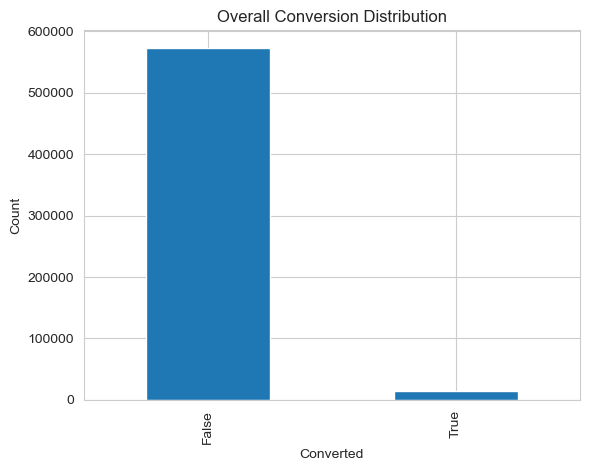

In [16]:
# Conversion distribution
df['converted'].value_counts().plot(kind='bar')
plt.title('Overall Conversion Distribution')
plt.xlabel('Converted')
plt.ylabel('Count')
plt.show()

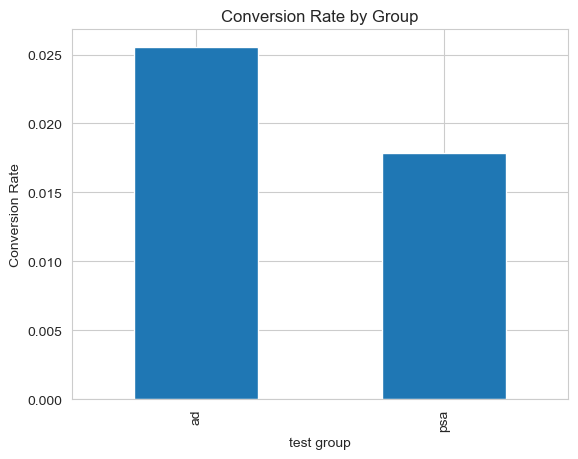

In [17]:
# Conversion rate by group
conversion_by_group = df.groupby('test group')['converted'].mean()
conversion_by_group.plot(kind='bar')
plt.title('Conversion Rate by Group')
plt.ylabel('Conversion Rate')
plt.show()

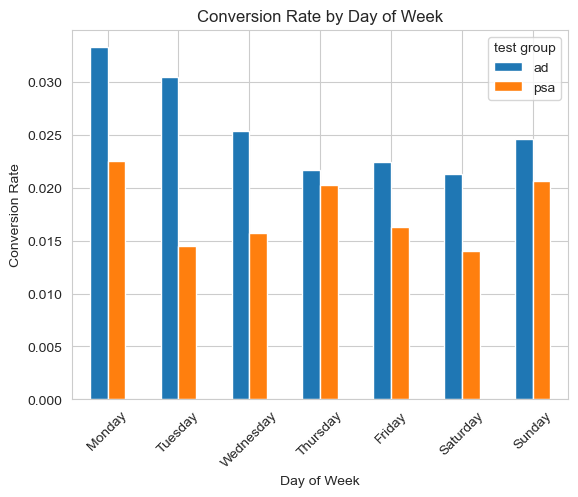

In [69]:
# Group by day and test group
day_conversion = df.groupby(['most ads day','test group'])['converted'].mean().unstack()

# Reorder days
day_order = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
day_conversion = day_conversion.reindex(day_order)

# Plot
day_conversion.plot(kind='bar')
plt.title('Conversion Rate by Day of Week')
plt.ylabel('Conversion Rate')
plt.xlabel('Day of Week')
plt.xticks(rotation=45)
plt.show()


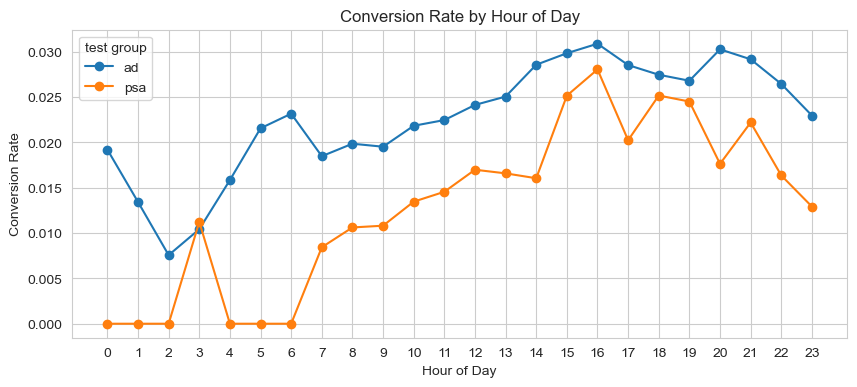

In [73]:
# Group by hour and test group
hour_conversion = df.groupby(['most ads hour','test group'])['converted'].mean().unstack()

# Plot
hour_conversion.plot(figsize=(10,4), marker='o')
plt.title('Conversion Rate by Hour of Day')
plt.ylabel('Conversion Rate')
plt.xlabel('Hour of Day')
plt.xticks(range(0,24))
plt.grid(True)
plt.show()


# Statistical Tests

## Conversion rates

In [22]:
#split into groups
group_ad = df[df['test group'] == 'ad']
group_psa = df[df['test group'] == 'psa']

# Calculate conversion rates
conv_ad = group_ad['converted'].mean()
conv_psa = group_psa['converted'].mean()

print("Conversion Rate - Ad group: ", round(conv_ad, 4))
print("Conversion Rate - PSA group:", round(conv_psa, 4))

Conversion Rate - Ad group:  0.0255
Conversion Rate - PSA group: 0.0179


## Absolute Lift & Relative Lift

In [39]:
#Absolute Lift: How much higher the Ad group performed vs PSA group.
#Relative Lift:Percentage improvement over PSA group.

absolute_lift = conv_ad - conv_psa
relative_lift = (absolute_lift/conv_psa)*100

print("Absolute Lift: ",round((absolute_lift),4))
print("Relative Lift: ",round((relative_lift),2),"%")

Absolute Lift:  0.0077
Relative Lift:  43.09 %


## Two-Proportion Z-Test 

In [44]:
#Is the difference in conversion rate between Ad vs PSA real, or just random chance?

# Number of conversions in each group
conversions = [
    group_ad['converted'].sum(),
    group_psa['converted'].sum()
]

# Number of users (sample sizes)
sample_sizes = [
    len(group_ad),
    len(group_psa)
]

# Run Z-test
z_stat, p_value = proportions_ztest(count=conversions, nobs=sample_sizes)

print("Z-statistic:", round(z_stat, 4))
print("P-value:", round(p_value, 6))

Z-statistic: 7.3701
P-value: 0.0


### Interpretation:
Since p-value = 0.0 < 0.05, the result is **statistically significant**.

- Ad group truly performs better

- Difference is real, not random

- You can recommend running the Ad version
